In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
help(patheffects.withSimplePatchShadow)

Help on class withSimplePatchShadow in module matplotlib.patheffects:

class withSimplePatchShadow(SimplePatchShadow)
 |  Adds a simple :class:`SimplePatchShadow` and then draws the
 |  original Artist to avoid needing to call :class:`Normal`.
 |  
 |  Method resolution order:
 |      withSimplePatchShadow
 |      SimplePatchShadow
 |      AbstractPathEffect
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draw_path(self, renderer, gc, tpath, affine, rgbFace)
 |      Overrides the standard draw_path to add the shadow offset and
 |      necessary color changes for the shadow.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from SimplePatchShadow:
 |  
 |  __init__(self, offset=(2, -2), shadow_rgbFace=None, alpha=None, rho=0.3, **kwargs)
 |      Parameters
 |      ----------
 |      offset : pair of floats
 |          The offset of the shadow in points.
 |      shadow_rgbFace : color
 |          The shadow color.
 |    

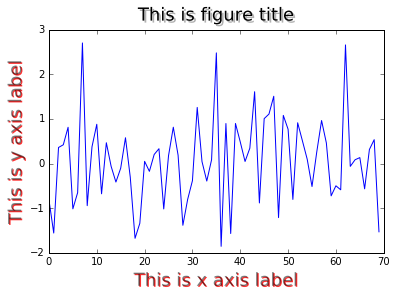

In [10]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np

data = np.random.randn(70)

fontsize = 18
plt.plot(data)
title = 'This is figure title'
x_label = 'This is x axis label'
y_label = 'This is y axis label'
s
title_text_obj = plt.title(
    title, fontsize=fontsize, verticalalignment='bottom')

title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

# offset_xy -- set the 'angele' of the shadow
# shadow_rgbFace -- set the color of the shadow
# patch_alpha -- setup the transparency of shadow

offset_xy = (1, -1)
rgbFace = (1.0, 0.0, 0.0) # Red
alpha = 0.8

# customize shadow properties
pe = patheffects.withSimplePatchShadow(
    offset=offset_xy, shadow_rgbFace=rgbFace, alpha=alpha)

# apply them to the xaxis and yaxis labels
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
xlabel_obj.set_path_effects([pe])

ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
ylabel_obj.set_path_effects([pe])

plt.show()

# matplotlib 组织图标 の 过程
## 最上层是一个 Figure 实例 包含所有可见的和其他不可见的内容 该 Figure 实例包含了一个 Axes 实例字段 Figure.axes  Axes 实例包含所有关心的所有东西：

We will create new figure
    1. 创建一个 基于一些随机数生成的数据的 plot
    2. 添加 title 和 axes 标签
    3. 添加 alpha 设置
    4. 向 title 和 axes 标签 来添加 阴影效果

#####  实例化 matplotlib.patheffects.withSimplePatchShadow object &nbsp; 并将之引用并保存在 pe 变量中 以供后面代码 来重用她

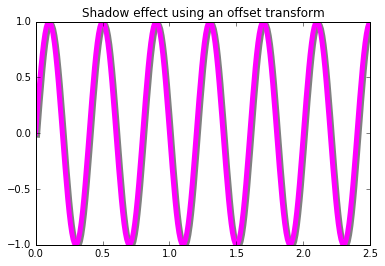

In [6]:
import matplotlib.transforms as transforms

def setup(layout=None):
	assert layout is not None
	fig = plt.figure()
	ax = fig.add_subplot(layout)
	return fig, ax

def get_signal():
	t = np.arange(0., 2.5, 0.01)
	s = np.sin(5 * np.pi * t)
	return t, s

def plot_signal(t, s):
	line, = axes.plot(t, s, linewidth=5, color='magenta')
	return line,

def make_shadow(fig, axes, line, t, s):
	delta = 2/72. # how many points to move the shadow
	offset = transforms.ScaledTranslation(delta, -delta, fig.dpi_scale_trans)
	offset_transform = axes.transData + offset

	# plot the same data, but now, using, offset, transform
	# zorder -- to render it below the line
	axes.plot(t, s, linewidth=5, color='gray', transform=offset_transform, zorder=0.5*line.get_zorder())

if __name__ == '__main__':
	fig, axes = setup(111)
	t, s = get_signal()
	line, = plot_signal(t, s)
	make_shadow(fig, axes, line, t, s)
	axes.set_title('Shadow effect using an offset transform')
	plt.show()

#####  通过 setup create figure and  axes, 然后 get a signal (生成一个正弦波数据) 在 plot_signal 绘制出 基本信号图 最后 进行 阴影坐标转换并在 make_shadow 绘制出 阴影 
##### 使用 偏移效果 创建一个 偏移对象 将阴影放置在 原始对象之下 并偏移几个 点的距离 即可实现
##### 原始对象是一个简单的正弦波 用 标准的 plot 进行绘制
matplotlib include a transformations helper -- matplotlib.transforms.ScaledTranslation 来添加 偏移转换

## 向图表添加数据表
### plt.table() create a 带单元格的表格， 并将它 添加到当前 坐标中 表格可以有 行标题与列标题 每个单元格包含文本 or 补片
    table(cellText=None, cellColours=None,
	cellLoc='right', colWidths=None,
	rowLabels=None, rowColours=None, rowLoc='left',
	colLabels=None, colColours=None, colLoc='center',
	loc='bottom', bbox=None)

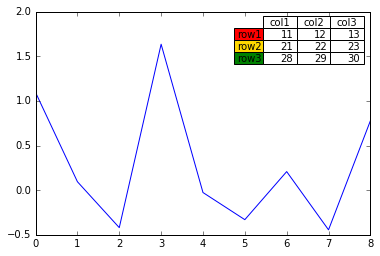

In [8]:
plt.figure()
ax = plt.gca()
y = np.random.randn(9)
col_labels = ['col1', 'col2', 'col3']
row_labels = ['row1', 'row2', 'row3']
table_vals = [[11, 12, 13], [21, 22, 23], [28, 29, 30]]
row_colors = ['red', 'gold', 'green']

my_tables = plt.table(cellText=table_vals,
					colWidths=[0.1] * 3,
					rowLabels=row_labels,
					colLabels=col_labels,
					rowColours=row_colors,
					loc='upper right')
plt.plot(y)
plt.show()

###### 函数 实例化 返回一个 matplotlib.table.Table 对象实例
###### 可将 该实例 添加到 axes 实例前 可有更多控制  可使用 Axes.add_table(table) method to 将 table 实例 添加到 axes 这里 table 是 matplotlib.table.Table 类的实例

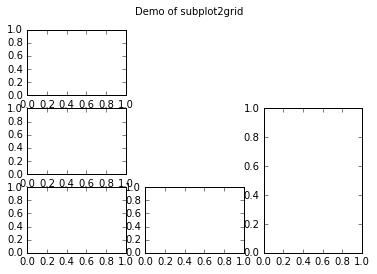

In [13]:
import matplotlib.pyplot as plt
plt.figure(0)

axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=1)
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=1)
axes3 = plt.subplot2grid((3, 3), (1, 2), rowspan=3)
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)

# tidy up tick labels size
all_axes = plt.gcf().axes
for ax in all_axes:
	for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
		ticklabel.set_fontsize(10)

plt.suptitle('Demo of subplot2grid')
plt.show()

##### 定制化 current axes or subplot
axes = fig.add_subplot(111)<br>
rectangle = axes.patch<br>
rectangle.set_facecolor('blue')<br>

##### 每个 axes  instance 包含一个 引用 rectangle instance patch attr -- 表示 current axes  背景 可更新 attr 进而更新 current axes 背景

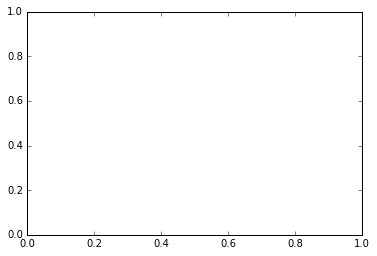

In [14]:
fig = plt.figure()
axes = fig.add_subplot(111)
rect = matplotlib.patches.Rectangle((1, 1), width=6, height=12)
axes.add_patch(rect)
# manually force a fig draw
axes.figure.canvas.draw()

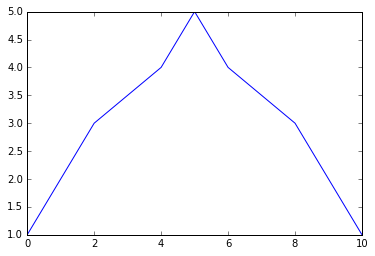

In [15]:
plt.plot([1,2,3,3.5,4,5,4,3.5,3,2,1])

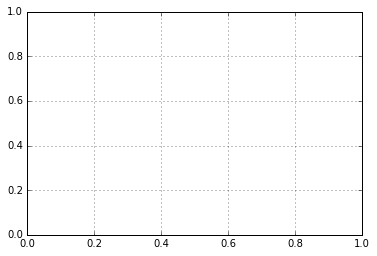

In [16]:
plt.grid()

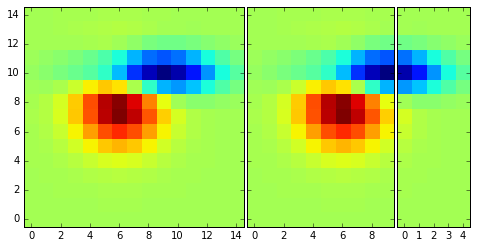

In [19]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.cbook import get_sample_data

def get_demo_image():
	f = get_sample_data('axes_grid/bivariate_normal.npy', asfileobj=False)
	# z is a numpy array of 15X15
	Z = np.load(f)
	return Z, (-3, 4, -4, 3)

def get_grid(fig=None, layout=None, nrows_ncols=None):
	assert fig is not None
	assert layout is not None
	assert nrows_ncols is not None

	grid = ImageGrid(fig, layout, nrows_ncols=nrows_ncols, axes_pad=0.05, add_all=True, label_mode='L')
	return grid

def load_images_to_grid(grid, Z, *images):
	min, max = Z.min(), Z.max()
	for i, image in enumerate(images):
		axes = grid[i]
		axes.imshow(image, origin='lower', vmin=min, vmax=max, interpolation='nearest')

if __name__ == '__main__':
	fig = plt.figure(1, (8, 5))
	grid = get_grid(fig, 111, (1, 3))
	Z, extent = get_demo_image()

	# slice iamge
	image1 = Z
	image2 = Z[:, :10]
	image3 = Z[:, 10:]

	load_images_to_grid(grid, Z, image1, image2, image3)

	plt.draw()
	plt.show()